In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

# from chart_studio.plotly import iplot # requires internet connection
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(cf.__version__)

sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

0.17.0


In [2]:
stock = 'adbe'

In [3]:
df = pd.read_csv('data/{}.csv'.format(stock), sep='|', parse_dates=True, index_col=0, header=None).T
df['Year'] = pd.to_datetime(df['Year'].astype('int32'), format='%Y', yearfirst=False)
df.set_index('Year', inplace=True)

df.head()

,Revenue,Revenue Growth,Gross Profit,Gross Margin,Operating Profit,Operating Margin,Earnings Per Share,EPS Growth,Return on Assets,Return on Equity,Return on Invested Capital,Free Cash Flow Growth,Equity Growth,Market Capitalization,Price-to-Earnings
Year,,,,,,,,,,,,,,,
2010-01-01,3800.0,29.0,3396.0,89.4,1009.0,26.6,1.47,101.4,10.0,15.4,18.8,-5.5,6.2,14597.0,18.84
2011-01-01,4216.0,11.0,3778.0,89.6,1122.0,26.6,1.65,12.2,9.7,15.2,19.3,41.3,11.4,13539.0,16.26
2012-01-01,4404.0,4.4,3920.0,89.0,1199.0,27.2,1.66,0.6,8.8,13.4,18.5,-7.8,15.3,17097.0,20.53
2013-01-01,4055.0,-7.9,3469.0,85.5,445.0,11.0,0.56,-66.3,2.8,4.3,6.0,-21.6,0.9,28518.0,98.34
2014-01-01,4147.0,2.3,3525.0,85.0,426.0,10.3,0.53,-5.4,2.5,4.0,5.6,18.3,0.8,36647.0,136.54


In [ ]:
df.dtypes

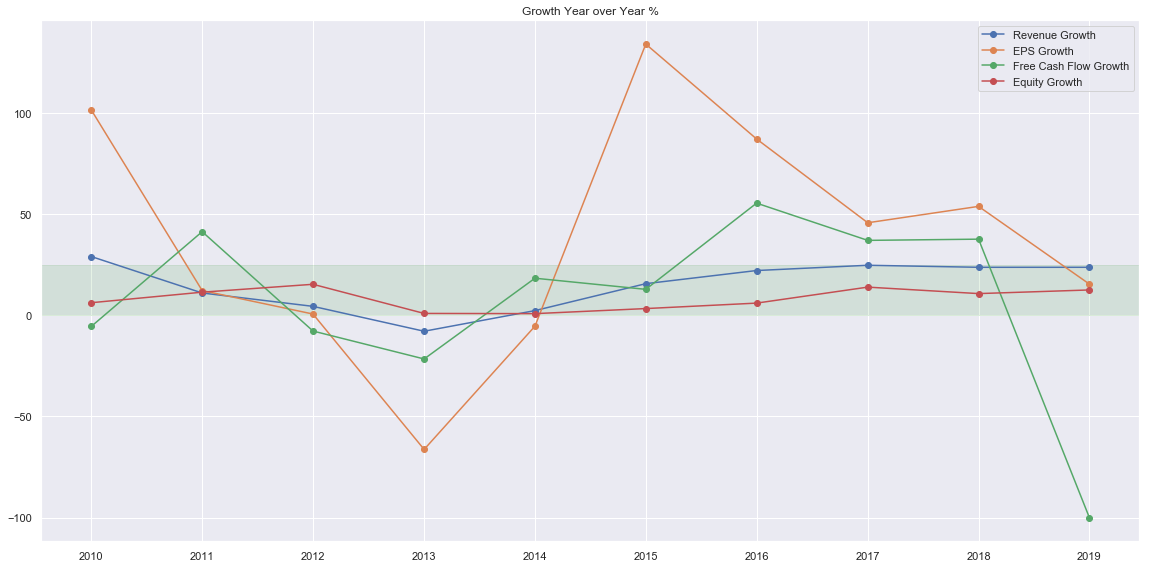

In [14]:
analysis_columns = ['Revenue Growth',
                    'EPS Growth',
                    'Free Cash Flow Growth',
                    'Equity Growth']

fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.set_title('Growth Year over Year %')
fig.tight_layout()

for c in analysis_columns:
    plt.plot(df[c], marker='o', linestyle='-', label=c)
ax.legend()

ax.axhspan(ymin=0, ymax=25, color='green', fill=True, alpha=.1)

plt.show()

In [ ]:
analysis_columns = ['Return on Invested Capital',
                    'Return on Assets',
                    'Return on Equity']

fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.set_title('Returns')
fig.tight_layout()

for c in analysis_columns:
    plt.plot(df[c], marker='o', linestyle='-', label=c)
ax.legend()
plt.show()

In [ ]:
analysis_columns = ['Earnings Per Share',
                    'Price-to-Earnings']

fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.set_title('Returns')
fig.tight_layout()

for c in analysis_columns:
    plt.plot(df[c], marker='o', linestyle='-', label=c)
ax.legend()
plt.show()

In [4]:
analysis_columns = ['Revenue Growth',
                    'EPS Growth',
                    'Free Cash Flow Growth',
                    'Equity Growth']
df[analysis_columns].iplot(kind='scatter', 
                           symbol='circle-dot',
                           legend={'x':-.1, 'y':1.2},
                           hspan={'y0':'0','y1':'25', 'color':'rgba(30,30,30,0.3)','fill':True,'opacity':.2},
                           title='Growth Year over Year %')

In [ ]:
# help(df.iplot)

# Add plots to the figure with loop

In [5]:
import plotly.graph_objects as go

fig = go.Figure()

for column in analysis_columns:
    fig.add_trace(go.Scatter(y=df[column], x=df.index, name=column))

fig.update_layout(legend_orientation="h")
fig.update_layout(legend={'x':.15, 'y':1.1})
fig.update_layout(title={'text': "Growth Year over Year %", 'y':0.95, 'x':0.5})
fig.show()